In [31]:
import pandas as pd;
import numpy as np;
from sklearn.preprocessing import OrdinalEncoder;
df = pd.read_csv('financial_risk_assessment.csv');
from sklearn.model_selection import train_test_split;
from sklearn.metrics import accuracy_score;

In [32]:
# Data Preprocessing

In [33]:
print(df.head())

   Age      Gender Education Level Marital Status   Income  Credit Score  \
0   49        Male             PhD       Divorced  72799.0         688.0   
1   57      Female      Bachelor's        Widowed      NaN         690.0   
2   21  Non-binary        Master's         Single  55687.0         600.0   
3   59        Male      Bachelor's         Single  26508.0         622.0   
4   25  Non-binary      Bachelor's        Widowed  49427.0         766.0   

   Loan Amount Loan Purpose Employment Status  Years at Current Job  \
0      45713.0     Business        Unemployed                    19   
1      33835.0         Auto          Employed                     6   
2      36623.0         Home          Employed                     8   
3      26541.0     Personal        Unemployed                     2   
4      36528.0     Personal        Unemployed                    10   

  Payment History  Debt-to-Income Ratio  Assets Value  Number of Dependents  \
0            Poor              0.1543

In [34]:
df.shape

(15000, 20)

In [35]:
print(df.isnull().sum())

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64


In [36]:
df['Income'].fillna(df["Income"].mean(),inplace=True);
df['Credit Score'].fillna(df["Credit Score"].mean(),inplace=True);
df['Loan Amount'].fillna(df["Loan Amount"].mean(),inplace=True);
df['Assets Value'].fillna(df["Assets Value"].mean(),inplace=True);
df['Number of Dependents'].fillna(df["Number of Dependents"].mode()[0],inplace=True);
df['Previous Defaults'].fillna(df["Previous Defaults"].mode()[0],inplace=True);

In [37]:
print(df.isnull().sum())

Age                      0
Gender                   0
Education Level          0
Marital Status           0
Income                   0
Credit Score             0
Loan Amount              0
Loan Purpose             0
Employment Status        0
Years at Current Job     0
Payment History          0
Debt-to-Income Ratio     0
Assets Value             0
Number of Dependents     0
City                     0
State                    0
Country                  0
Previous Defaults        0
Marital Status Change    0
Risk Rating              0
dtype: int64


In [38]:
#Feature Engineering

In [39]:
# Create new features based on the proposed ideas

# 1. Income Stability: Income divided by Years at Current Job (handling missing values in Income)
df['Income Stability'] = df['Income'] / (df['Years at Current Job'] + 1)  # Add 1 to avoid division by zero

# 2. Credit Utilization: Loan Amount divided by Assets Value (handling missing values in both columns)
df['Credit Utilization'] = df['Loan Amount'] / (df['Assets Value'] + 1)  # Add 1 to avoid division by zero

# 3. Dependents-to-Income Ratio: Number of Dependents divided by Income
df['Dependents-to-Income Ratio'] = df['Number of Dependents'] / (df['Income'] + 1)  # Add 1 to avoid division by zero

# 4. Employment Duration Category: Categorize Years at Current Job into 'Low', 'Medium', 'High'
df['Employment Duration Category'] = pd.cut(df['Years at Current Job'], 
                                              bins=[-1, 5, 10, 100], 
                                              labels=['Low', 'Medium', 'High'])

# 5. Debt-to-Income Group: Group Debt-to-Income Ratio into 'Low', 'Medium', 'High' based on arbitrary cutoffs
df['Debt-to-Income Group'] = pd.cut(df['Debt-to-Income Ratio'], 
                                      bins=[-1, 0.15, 0.3, 1.0], 
                                      labels=['Low', 'Medium', 'High'])

# Display the first few rows of the dataset with the new columns
df[['Income Stability', 'Credit Utilization', 'Dependents-to-Income Ratio', 
      'Employment Duration Category', 'Debt-to-Income Group']].head()


,Income Stability,Credit Utilization,Dependents-to-Income Ratio,Employment Duration Category,Debt-to-Income Group
0,3639.950000,0.380216,0.000000,High,Medium
1,9990.485501,0.605819,0.000000,Medium,Low
2,6187.444444,0.202672,0.000054,Medium,High
3,8836.000000,0.168707,0.000113,Low,High
4,4493.363636,0.127213,0.000081,Medium,Low


In [40]:
df.shape

(15000, 25)

In [41]:
df.drop(['City','State','Country'],axis=1,inplace=True)
df

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,...,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change,Risk Rating,Income Stability,Credit Utilization,Dependents-to-Income Ratio,Employment Duration Category,Debt-to-Income Group
0,49,Male,PhD,Divorced,72799.00000,688.0,45713.000000,Business,Unemployed,19,...,120228.000000,0.0,2.0,2,Low,3639.950000,0.380216,0.000000,High,Medium
1,57,Female,Bachelor's,Widowed,69933.39851,690.0,33835.000000,Auto,Employed,6,...,55849.000000,0.0,3.0,2,Medium,9990.485501,0.605819,0.000000,Medium,Low
2,21,Non-binary,Master's,Single,55687.00000,600.0,36623.000000,Home,Employed,8,...,180700.000000,3.0,3.0,2,Medium,6187.444444,0.202672,0.000054,Medium,High
3,59,Male,Bachelor's,Single,26508.00000,622.0,26541.000000,Personal,Unemployed,2,...,157319.000000,3.0,4.0,2,Medium,8836.000000,0.168707,0.000113,Low,High
4,25,Non-binary,Bachelor's,Widowed,49427.00000,766.0,36528.000000,Personal,Unemployed,10,...,287140.000000,4.0,3.0,1,Low,4493.363636,0.127213,0.000081,Medium,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.00000,609.0,26187.000000,Home,Self-employed,2,...,159741.497176,4.0,2.0,0,Low,16029.333333,0.163933,0.000083,Low,High
14996,56,Male,PhD,Single,107193.00000,700.0,35111.000000,Auto,Self-employed,10,...,79102.000000,4.0,0.0,0,Medium,9744.818182,0.443864,0.000037,Medium,Medium
14997,29,Non-binary,PhD,Married,46250.00000,642.0,44369.000000,Home,Unemployed,19,...,196930.000000,4.0,2.0,1,High,2312.500000,0.225302,0.000086,High,High
14998,53,Non-binary,PhD,Divorced,40180.00000,638.0,32752.000000,Home,Self-employed,12,...,276060.000000,4.0,0.0,2,High,3090.769231,0.118640,0.000100,High,High


In [42]:
df

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,...,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change,Risk Rating,Income Stability,Credit Utilization,Dependents-to-Income Ratio,Employment Duration Category,Debt-to-Income Group
0,49,Male,PhD,Divorced,72799.00000,688.0,45713.000000,Business,Unemployed,19,...,120228.000000,0.0,2.0,2,Low,3639.950000,0.380216,0.000000,High,Medium
1,57,Female,Bachelor's,Widowed,69933.39851,690.0,33835.000000,Auto,Employed,6,...,55849.000000,0.0,3.0,2,Medium,9990.485501,0.605819,0.000000,Medium,Low
2,21,Non-binary,Master's,Single,55687.00000,600.0,36623.000000,Home,Employed,8,...,180700.000000,3.0,3.0,2,Medium,6187.444444,0.202672,0.000054,Medium,High
3,59,Male,Bachelor's,Single,26508.00000,622.0,26541.000000,Personal,Unemployed,2,...,157319.000000,3.0,4.0,2,Medium,8836.000000,0.168707,0.000113,Low,High
4,25,Non-binary,Bachelor's,Widowed,49427.00000,766.0,36528.000000,Personal,Unemployed,10,...,287140.000000,4.0,3.0,1,Low,4493.363636,0.127213,0.000081,Medium,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.00000,609.0,26187.000000,Home,Self-employed,2,...,159741.497176,4.0,2.0,0,Low,16029.333333,0.163933,0.000083,Low,High
14996,56,Male,PhD,Single,107193.00000,700.0,35111.000000,Auto,Self-employed,10,...,79102.000000,4.0,0.0,0,Medium,9744.818182,0.443864,0.000037,Medium,Medium
14997,29,Non-binary,PhD,Married,46250.00000,642.0,44369.000000,Home,Unemployed,19,...,196930.000000,4.0,2.0,1,High,2312.500000,0.225302,0.000086,High,High
14998,53,Non-binary,PhD,Divorced,40180.00000,638.0,32752.000000,Home,Self-employed,12,...,276060.000000,4.0,0.0,2,High,3090.769231,0.118640,0.000100,High,High


In [43]:
# EDA
import matplotlib.pyplot as plt;
import seaborn as sns;


Distribution of numerical columns:


C:\Users\P SAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


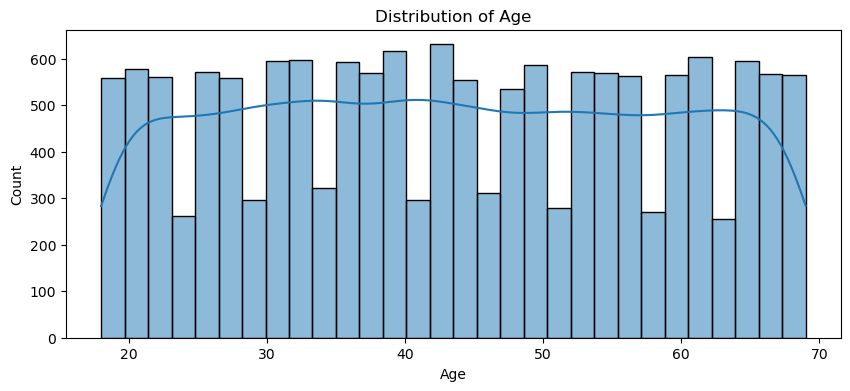

C:\Users\P SAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


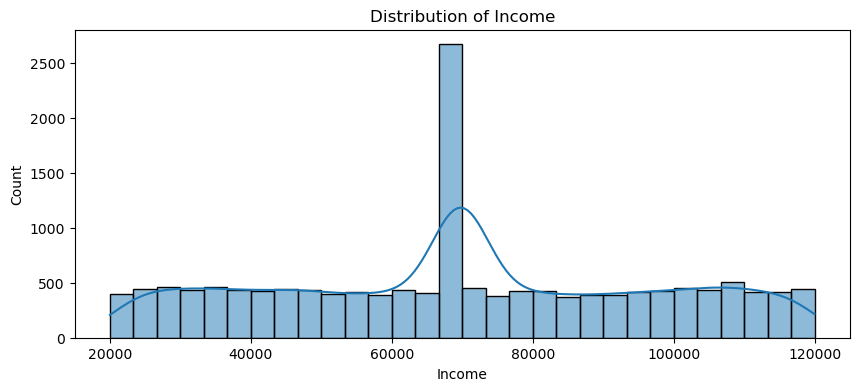

C:\Users\P SAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


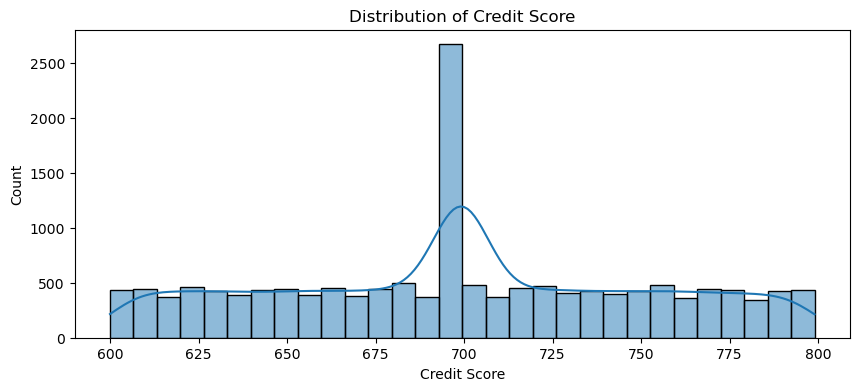

C:\Users\P SAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


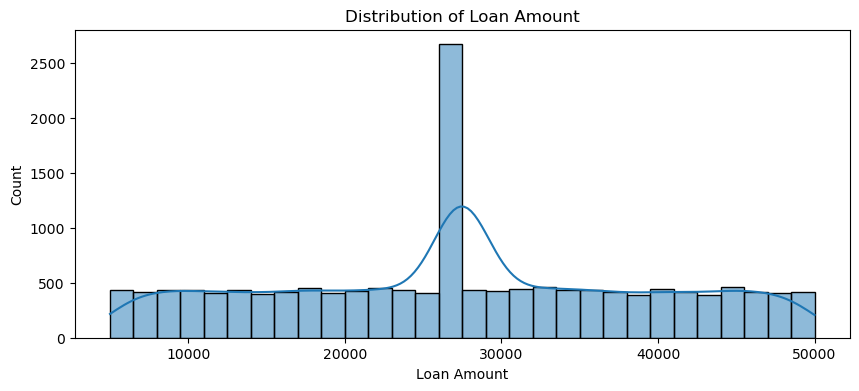

C:\Users\P SAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


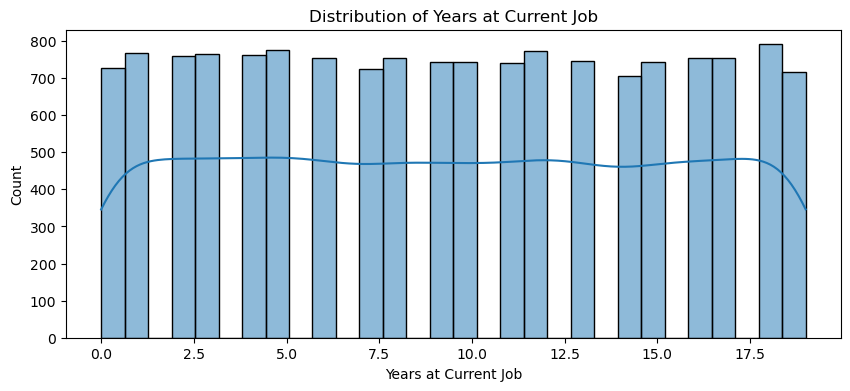

C:\Users\P SAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


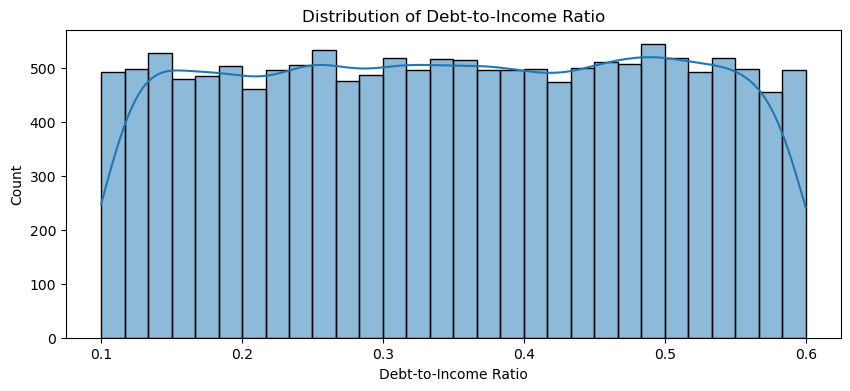

C:\Users\P SAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


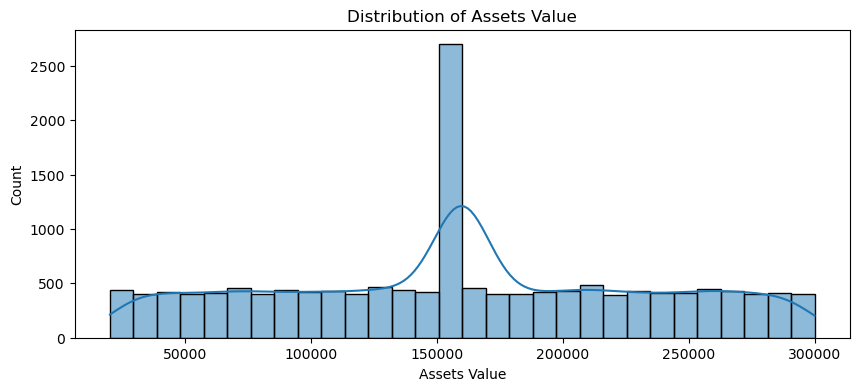

C:\Users\P SAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


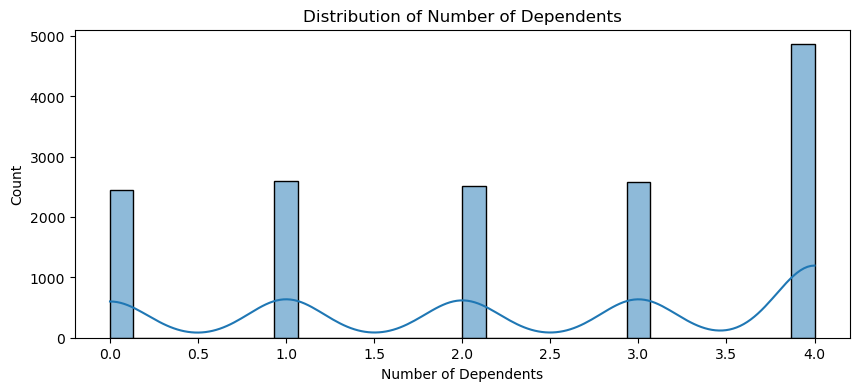

C:\Users\P SAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


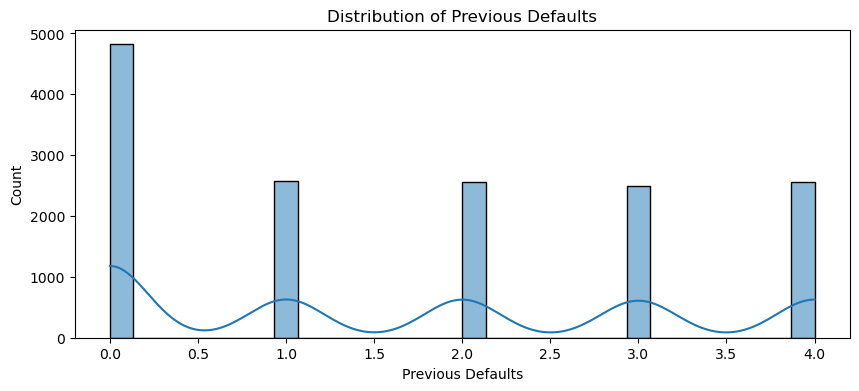

C:\Users\P SAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


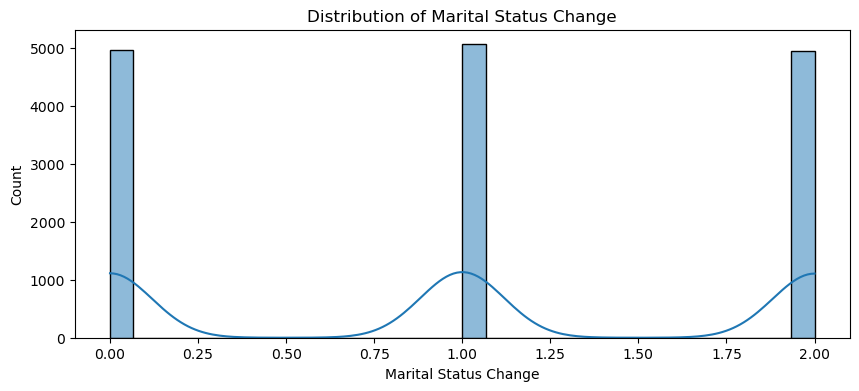

C:\Users\P SAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


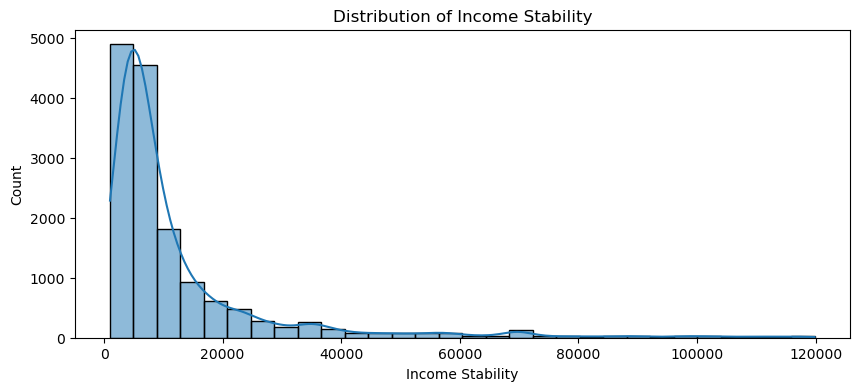

C:\Users\P SAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


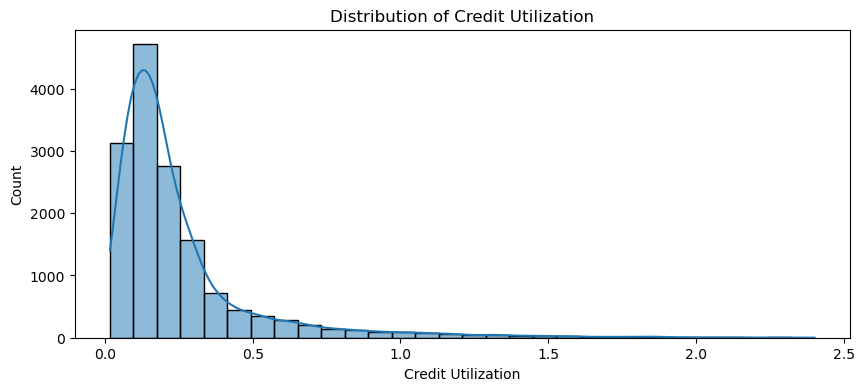

C:\Users\P SAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


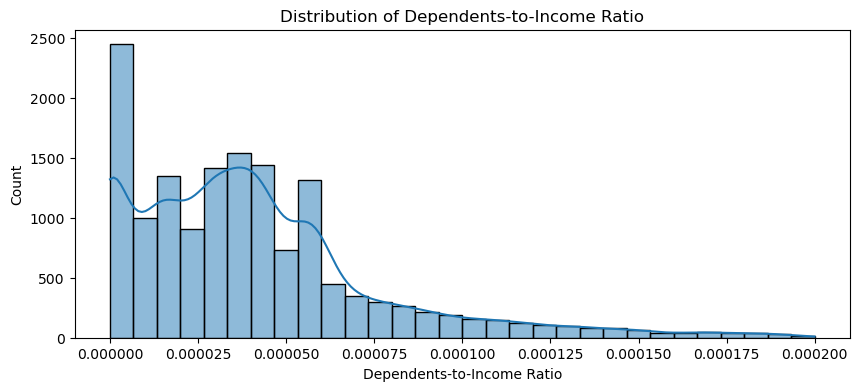

In [51]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
print("\nDistribution of numerical columns:")
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

In [14]:
# Normalisation

In [44]:
from sklearn.preprocessing import StandardScaler
X = df.drop('Risk Rating',axis=1);
df['Risk Rating'] = df['Risk Rating'].map({'Low': 0, 'Medium': 1, 'High': 2});
y = df['Risk Rating'];
# Select only numeric columns for scaling
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the numeric columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Display the variance to verify that it is approximately 1
print(X[numeric_columns].var())


Age                           1.000067
Income                        1.000067
Credit Score                  1.000067
Loan Amount                   1.000067
Years at Current Job          1.000067
Debt-to-Income Ratio          1.000067
Assets Value                  1.000067
Number of Dependents          1.000067
Previous Defaults             1.000067
Marital Status Change         1.000067
Income Stability              1.000067
Credit Utilization            1.000067
Dependents-to-Income Ratio    1.000067
dtype: float64


In [45]:
from collections import Counter
Counter(y)

Counter({0: 9000, 1: 4500, 2: 1500})

In [46]:
# Categorical to Numerical Conversion

In [47]:
#X = pd.get_dummies(X, columns=['Gender', 'Marital Status', 'Loan Purpose', 'Employment Status'], drop_first=True)
ordinal_encoder = OrdinalEncoder(categories=[['High School', "Bachelor's", "Master's", "PhD"], 
                                             ['Poor', 'Fair','Good' ,'Excellent'],
                                             ['Low', 'Medium', 'High'],
                                             ['Low', 'Medium', 'High'],
                                             ['Non-binary','Female','Male'],
                                             ['Widowed','Divorced' , 'Married' ,'Single'],
                                           [ 'Personal','Auto','Business' ,'Home'],
                                             ['Employed' ,'Self-employed' ,'Unemployed'] ] );
X[['Education Level', 'Payment History', 'Employment Duration Category','Debt-to-Income Group','Gender', 'Marital Status', 'Loan Purpose', 'Employment Status']] = ordinal_encoder.fit_transform(
    X[['Education Level', 'Payment History', 'Employment Duration Category','Debt-to-Income Group','Gender', 'Marital Status', 'Loan Purpose', 'Employment Status']])

In [30]:
# Identify boolean columns
bool_columns = X.select_dtypes(include=['bool']).columns

# Convert boolean columns to 1 and 0
X[bool_columns] = X[bool_columns].astype(int)



In [50]:
X.head

<bound method NDFrame.head of             Age  Gender  Education Level  Marital Status    Income  \
0      0.372049     2.0              3.0             1.0  0.106582   
1      0.908593     1.0              1.0             0.0  0.000000   
2     -1.505856     0.0              2.0             3.0 -0.529872   
3      1.042729     2.0              1.0             3.0 -1.615139   
4     -1.237584     0.0              1.0             0.0 -0.762703   
...         ...     ...              ...             ...       ...   
14995 -1.371720     0.0              1.0             0.0 -0.812505   
14996  0.841525     2.0              3.0             3.0  1.385812   
14997 -0.969312     0.0              3.0             2.0 -0.880866   
14998  0.640321     0.0              3.0             1.0 -1.106630   
14999 -1.304652     0.0              1.0             0.0  0.000000   

       Credit Score  Loan Amount  Loan Purpose  Employment Status  \
0         -0.210556     1.529719           2.0              

In [48]:
columns=['Gender', 'Marital Status', 'Loan Purpose', 'Employment Status']
for i in columns:
    uq,ct = np.unique(X[i],return_counts=True);
    print(uq);
    print(ct);

[0. 1. 2.]
[5059 4990 4951]
[0. 1. 2. 3.]
[3893 3787 3623 3697]
[0. 1. 2. 3.]
[3771 3725 3738 3766]
[0. 1. 2.]
[5026 4991 4983]


[0 1 2] [9000 4500 1500]


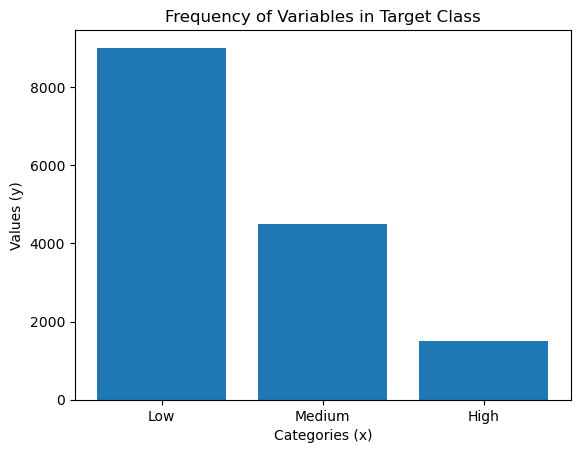

In [51]:
uq,ct = np.unique(y,return_counts=True);
print(uq,ct)
plt.bar(['Low','Medium','High'],ct)
plt.title('Frequency of Variables in Target Class')  
plt.xlabel('Categories (x)')  
plt.ylabel('Values (y)')  # You can choose different colors    
plt.show()  

[0 1 2] [9000 9000 9000]


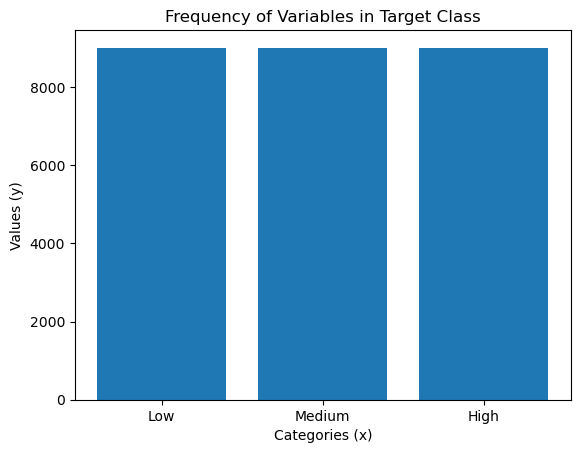

In [53]:
# smote is used to balance the dataset
from imblearn.over_sampling import SMOTE
def balance_with_smote(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    return X_resampled, y_resampled
X,y = balance_with_smote(X,y)
uq,ct = np.unique(y,return_counts=True);
print(uq,ct)
plt.bar(['Low','Medium','High'],ct)
plt.title('Frequency of Variables in Target Class')  
plt.xlabel('Categories (x)')  
plt.ylabel('Values (y)')  # You can choose different colors    
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # For continuous data
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model (Gaussian Naive Bayes for continuous features)
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.3861


In [56]:
X.shape

(27000, 21)

In [58]:

from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# You can also print feature importance if needed
print("Feature Importances:")
for feature, importance in zip(X.columns, rf_model.feature_importances_):
    print(f"{feature}: {importance:.4f}")


Accuracy: 0.7637
Feature Importances:
Age: 0.0595
Gender: 0.0458
Education Level: 0.0396
Marital Status: 0.0384
Income: 0.0584
Credit Score: 0.0596
Loan Amount: 0.0595
Loan Purpose: 0.0405
Employment Status: 0.0446
Years at Current Job: 0.0509
Payment History: 0.0439
Debt-to-Income Ratio: 0.0610
Assets Value: 0.0590
Number of Dependents: 0.0383
Previous Defaults: 0.0537
Marital Status Change: 0.0358
Income Stability: 0.0580
Credit Utilization: 0.0594
Dependents-to-Income Ratio: 0.0539
Employment Duration Category: 0.0195
Debt-to-Income Group: 0.0205


In [26]:
# Gradient boosting
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.6283


In [27]:
# Xgboost
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.7011


In [28]:
# Bagging
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Bagging classifier with RandomForestClassifier as the base estimator
bagging_model = BaggingClassifier(RandomForestClassifier(n_estimators=10, random_state=42), n_estimators=50, random_state=42)

# Train the Bagging model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.7557


In [29]:
# Stacking
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the base models and the meta-model
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svm', SVC(kernel='linear', random_state=42))
]

# Meta-model (Logistic Regression)
meta_model = LogisticRegression()

# Stacking Classifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Train the Stacking model
stacking_model.fit(X_train, y_train)
 
# Make predictions
y_pred = stacking_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.6656


In [70]:
from sklearn.preprocessing import LabelEncoder,StandardScaler;
from sklearn.model_selection import train_test_split;
from sklearn.feature_selection import SelectKBest,RFE;
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score;
from sklearn.linear_model import LogisticRegression;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.svm import SVC;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.decomposition import PCA;
from sklearn.manifold import TSNE;
from sklearn.feature_selection import f_classif

In [72]:
# Get the feature names
feature_names = X.columns

# 1. Filter Method: Select K Best (based on ANOVA F-test)
select_k_best = SelectKBest(f_classif, k=18)
X_k_best = select_k_best.fit_transform(X, Y)

# Get the mask of selected features and their names
k_best_features_mask = select_k_best.get_support()
k_best_features = feature_names[k_best_features_mask]

print("Selected features using SelectKBest:")
print(k_best_features)

# 2. Wrapper Method: Recursive Feature Elimination (RFE) with Logistic Regression
model = LogisticRegression(max_iter=500)
rfe = RFE(model, n_features_to_select=12)
X_rfe = rfe.fit_transform(X,Y)

# Get the mask of selected features and their names
rfe_features_mask = rfe.get_support()
rfe_selected_features = feature_names[rfe_features_mask]

print("\nSelected features using RFE:")
print(rfe_selected_features)

Selected features using SelectKBest:
Index(['Age', 'Gender', 'Marital Status', 'Income', 'Credit Score',
       'Loan Amount', 'Loan Purpose', 'Employment Status',
       'Years at Current Job', 'Payment History', 'Debt-to-Income Ratio',
       'Assets Value', 'Marital Status Change', 'Income Stability',
       'Credit Utilization', 'Dependents-to-Income Ratio',
       'Employment Duration Category', 'Debt-to-Income Group'],
      dtype='object')

Selected features using RFE:
Index(['Age', 'Gender', 'Income', 'Loan Amount', 'Years at Current Job',
       'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents',
       'Marital Status Change', 'Credit Utilization',
       'Dependents-to-Income Ratio', 'Debt-to-Income Group'],
      dtype='object')


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.36      0.33      0.34      2700
           1       0.34      0.28      0.31      2700
           2       0.37      0.47      0.41      2700

    accuracy                           0.36      8100
   macro avg       0.36      0.36      0.35      8100
weighted avg       0.36      0.36      0.35      8100

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.57      0.56      0.57      2700
           1       0.46      0.44      0.45      2700
           2       0.63      0.68      0.65      2700

    accuracy                           0.56      8100
   macro avg       0.56      0.56      0.56      8100
weighted avg       0.56      0.56      0.56      8100

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.64      0.92      0.75      27

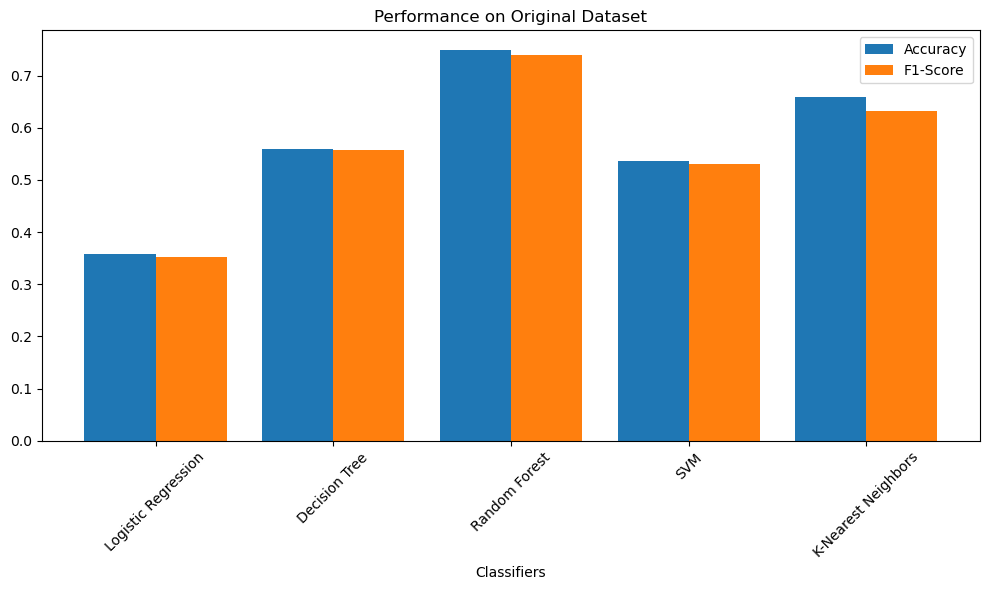

In [75]:
# PCA for feature reduction 
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X)

# t-SNE for feature reduction (down to 2 dimensions for visualization)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
# Assuming X, X_pca, X_rfe, and y are available (preprocessed datasets)

# Split the data for each feature set (original, PCA, RFE)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42,stratify = Y)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42 , stratify = Y)
X_rfe_train, X_rfe_test, y_rfe_train,y_rfe_test = train_test_split(X_rfe, Y, test_size=0.3, random_state=42, stratify = Y)

# Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Function to train and evaluate classifiers
def evaluate_classifiers(X_train, X_test, y_train, y_test):
    results = {}
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # Collect metrics
        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1-Score': f1_score(y_test, y_pred, average='weighted'),
            'Report': classification_report(y_test, y_pred)
        }
        print(f"Classification Report for {name}:\n", results[name]['Report'])
    return results

# Plotting the results (accuracy and F1-score) for comparison
def plot_results(results, title):
    classifiers = list(results.keys())
    accuracy = [results[clf]['Accuracy'] for clf in classifiers]
    f1_score = [results[clf]['F1-Score'] for clf in classifiers]

    x = np.arange(len(classifiers))

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - 0.2, accuracy, 0.4, label='Accuracy')
    ax.bar(x + 0.2, f1_score, 0.4, label='F1-Score')

    # Adding labels
    ax.set_xlabel('Classifiers')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(classifiers, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()



# Evaluate classifiers on each dataset
results_original = evaluate_classifiers(X_train, X_test, y_train, y_test)
# Plot for original dataset
plot_results(results_original, "Performance on Original Dataset")



Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.34      0.30      0.32      2700
           1       0.35      0.33      0.34      2700
           2       0.35      0.42      0.38      2700

    accuracy                           0.35      8100
   macro avg       0.35      0.35      0.35      8100
weighted avg       0.35      0.35      0.35      8100

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.49      0.46      0.48      2700
           1       0.52      0.51      0.51      2700
           2       0.64      0.69      0.66      2700

    accuracy                           0.55      8100
   macro avg       0.55      0.55      0.55      8100
weighted avg       0.55      0.55      0.55      8100

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.66      0.68      0.67      27

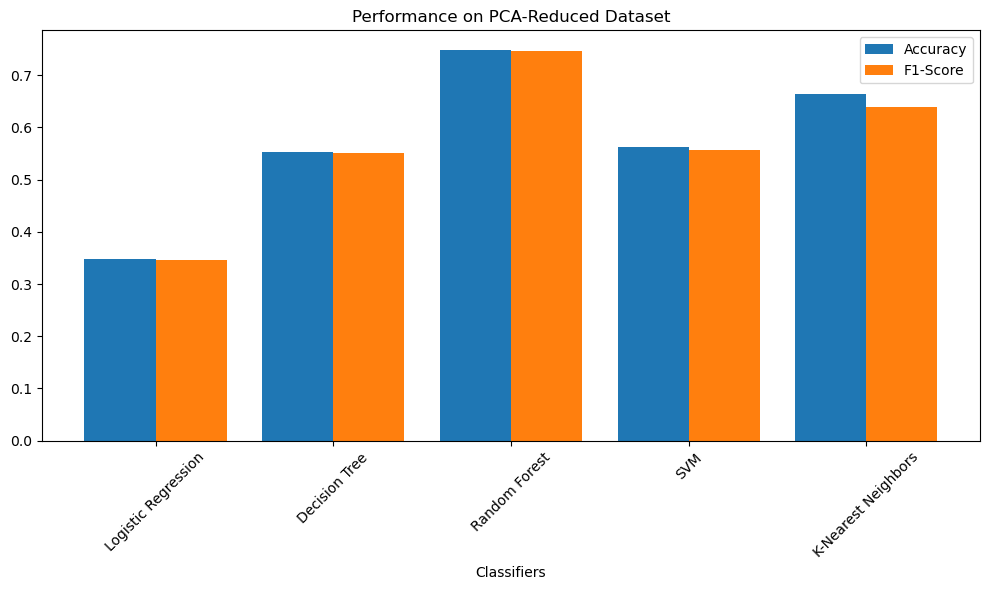

In [76]:
results_pca = evaluate_classifiers(X_pca_train, X_pca_test, y_train, y_test)
# Plot for PCA-reduced dataset
plot_results(results_pca, "Performance on PCA-Reduced Dataset")


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.35      0.34      0.35      2700
           1       0.35      0.26      0.30      2700
           2       0.36      0.46      0.41      2700

    accuracy                           0.36      8100
   macro avg       0.35      0.36      0.35      8100
weighted avg       0.35      0.36      0.35      8100

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.57      0.53      0.55      2700
           1       0.46      0.46      0.46      2700
           2       0.63      0.65      0.64      2700

    accuracy                           0.55      8100
   macro avg       0.55      0.55      0.55      8100
weighted avg       0.55      0.55      0.55      8100

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.62      0.83      0.70      27

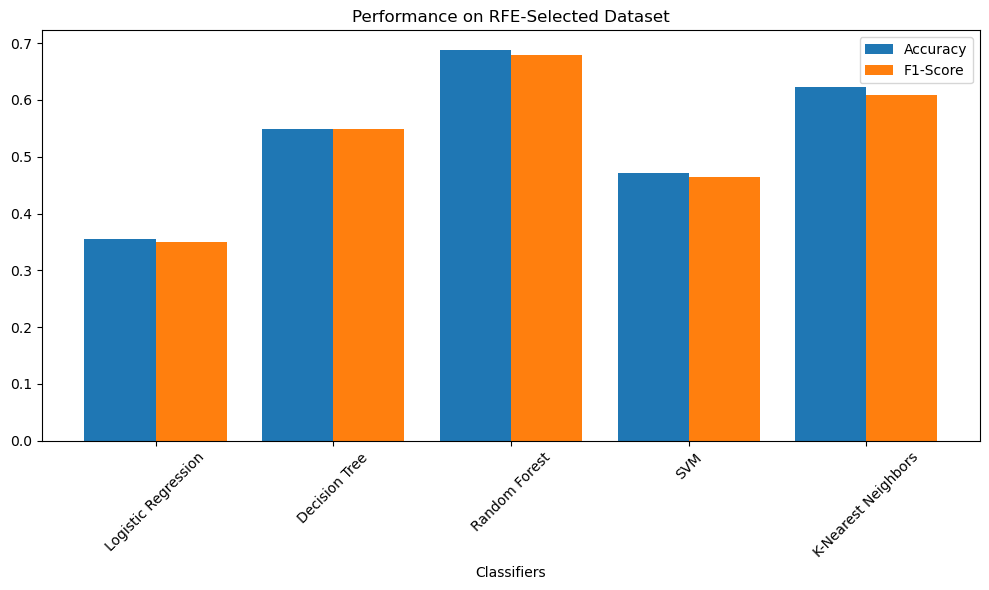

In [77]:


results_rfe = evaluate_classifiers(X_rfe_train, X_rfe_test, y_train, y_test)
# Plot for RFE-selected dataset
plot_results(results_rfe, "Performance on RFE-Selected Dataset")


In [78]:
X.shape

(27000, 21)

In [79]:
# Neural Networks (RNN)

In [92]:
X_train.shape

(800, 10)

In [93]:
y_train.shape

(800,)

In [6]:
import pandas as pd
from sklearn.impute import KNNImputer

# Load your dataset
# Replace 'your_dataset.csv' with your file path

# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()

# Display missing value statistics
print("Missing values per column:")
print(df[missing_columns].isnull().sum())

# Create a KNN imputer instance
knn_imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation only on the columns with missing values
df[missing_columns] = knn_imputer.fit_transform(df[missing_columns])

# Display the dataset after imputation
print("Data after KNN imputation:")
print(df.head())


Missing values per column:
Income                  2250
Credit Score            2250
Loan Amount             2250
Assets Value            2250
Number of Dependents    2250
Previous Defaults       2250
dtype: int64
Data after KNN imputation:
   Age      Gender Education Level Marital Status   Income  Credit Score  \
0   49        Male             PhD       Divorced  72799.0         688.0   
1   57      Female      Bachelor's        Widowed  50079.2         690.0   
2   21  Non-binary        Master's         Single  55687.0         600.0   
3   59        Male      Bachelor's         Single  26508.0         622.0   
4   25  Non-binary      Bachelor's        Widowed  49427.0         766.0   

   Loan Amount Loan Purpose Employment Status  Years at Current Job  \
0      45713.0     Business        Unemployed                    19   
1      33835.0         Auto          Employed                     6   
2      36623.0         Home          Employed                     8   
3      26541.0    

In [16]:
print(df.isnull().sum())

Age                      0
Gender                   0
Education Level          0
Marital Status           0
Income                   0
Credit Score             0
Loan Amount              0
Loan Purpose             0
Employment Status        0
Years at Current Job     0
Payment History          0
Debt-to-Income Ratio     0
Assets Value             0
Number of Dependents     0
City                     0
State                    0
Country                  0
Previous Defaults        0
Marital Status Change    0
Risk Rating              0
dtype: int64


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Example: Create a dummy DataFrame (replace with your actual df)
np.random.seed(42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Define the neural network
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(8, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2, verbose=1)

# 5. Evaluate the results
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predictions and metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")


C:\Users\P SAI\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3362 - loss: 0.1730 - val_accuracy: 0.3238 - val_loss: -0.1227
Epoch 2/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3368 - loss: -0.0616 - val_accuracy: 0.3236 - val_loss: -0.7955
Epoch 3/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3309 - loss: -1.1909 - val_accuracy: 0.3220 - val_loss: -2.9440
Epoch 4/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3388 - loss: -3.0360 - val_accuracy: 0.3218 - val_loss: -6.8413
Epoch 5/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3276 - loss: -8.6468 - val_accuracy: 0.3225 - val_loss: -12.7190
Epoch 6/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3410 - loss: -11.6989 - val_accuracy: 0.3231 - val_loss: -21.6805
Epoch 7/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3385 - loss: -21.5062 - val_accuracy: 0.3234 - val_loss: -34.0333
Epoch 8/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.336

In [25]:
X

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,...,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change,Income Stability,Credit Utilization,Dependents-to-Income Ratio,Employment Duration Category,Debt-to-Income Group
0,0.372049,2.000000,3.000000,1.000000,0.106582,-0.210556,1.529719,2.000000,2.000000,1.650699,...,-1.362787,-0.533762,-1.569624,0.205990,1.230755,-0.538762,0.491180,-1.122482,2.000000,1.000000
1,0.908593,1.000000,1.000000,0.000000,0.000000,-0.172649,0.534811,1.000000,0.000000,-0.602523,...,-1.400265,-1.403416,-1.569624,0.878279,1.230755,-0.149979,1.351206,-1.122482,1.000000,0.000000
2,-1.505856,0.000000,2.000000,3.000000,-0.529872,-1.878458,0.768335,3.000000,0.000000,-0.255874,...,0.083105,0.283115,0.457848,0.878279,1.230755,-0.382803,-0.185641,0.370246,1.000000,2.000000
3,1.042729,2.000000,1.000000,3.000000,-1.615139,-1.461482,-0.076139,0.000000,2.000000,-1.295822,...,0.726309,-0.032724,0.457848,1.550569,1.230755,-0.220657,-0.315118,2.013323,0.000000,2.000000
4,-1.237584,0.000000,1.000000,0.000000,-0.762703,1.267812,0.760378,0.000000,2.000000,0.090776,...,-1.439714,1.720943,1.133672,0.878279,0.001884,-0.486515,-0.473300,1.119892,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,0.660654,1.848412,1.151588,0.000000,-1.500213,0.183566,0.829099,3.000000,2.000000,1.109539,...,1.151779,1.366637,1.133672,-1.138590,1.044473,-0.635843,-0.404547,2.675109,1.696824,2.000000
26996,-1.202030,1.000000,0.647160,2.352840,1.567659,-0.040855,-0.170918,1.647160,2.000000,-1.132641,...,-0.543915,0.700453,0.895214,-0.466300,0.001884,1.325225,-0.481610,-0.222139,0.000000,1.000000
26997,-0.393390,1.000000,0.917426,2.917426,0.457126,-0.020503,-0.543212,0.917426,1.082574,-0.227249,...,-0.381430,-0.030530,0.513654,-0.410786,-1.226986,-0.209066,-0.450956,-0.072879,1.000000,1.917426
26998,0.079928,1.000000,0.679837,0.000000,-1.057892,0.151043,1.095617,2.000000,0.000000,-0.089397,...,-0.257002,-0.734369,1.133672,0.232552,1.230755,-0.497435,0.507191,1.606549,1.320163,1.320163


In [27]:
y=df['Risk Rating']

In [28]:
y

0        0
1        1
2        1
3        1
4        0
        ..
14995    0
14996    1
14997    2
14998    2
14999    0
Name: Risk Rating, Length: 15000, dtype: int64

In [63]:
X=X.drop('Risk Rating',axis=1)

In [31]:
X.shape

(27000, 21)

In [32]:
y.shape

(15000,)

In [56]:
x.to_csv('input.csv', index=False)  


In [54]:
x=X

In [55]:
x['Risk Rating'] = y

In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


# Preprocess the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels to categorical (one-hot encoding)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.3, random_state=42)

# Build the ANN model
model = Sequential([
    Dense(64, input_dim=21, activation='relu'),  # Input layer with 21 features
    Dense(32, activation='relu'),               # Hidden layer
    Dense(3, activation='softmax')              # Output layer with 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print the classification report
print(classification_report(y_true, y_pred, target_names=encoder.classes_.astype(str)))


Epoch 1/50


C:\Users\P SAI\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3534 - loss: 1.1106 - val_accuracy: 0.3741 - val_loss: 1.0893
Epoch 2/50
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4061 - loss: 1.0739 - val_accuracy: 0.4045 - val_loss: 1.0729
Epoch 3/50
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4365 - loss: 1.0567 - val_accuracy: 0.4336 - val_loss: 1.0587
Epoch 4/50
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4693 - loss: 1.0345 - val_accuracy: 0.4574 - val_loss: 1.0436
Epoch 5/50
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4832 - loss: 1.0134 - val_accuracy: 0.4550 - val_loss: 1.0355
Epoch 6/50
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5011 - loss: 0.9990 - val_accuracy: 0.4656 - val_loss: 1.0255
Epoch 7/50
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5120 - loss: 0.9840 - val_accuracy: 0.4751 - val_loss: 1.0196
Epoch 8/50
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5221 - loss: 0.9680 - val_accuracy: 0.4791 - val_

In [70]:
y_categorical = to_categorical(y)
class_names = encoder.classes_

AttributeError: 'LabelEncoder' object has no attribute 'classes_'

In [66]:
y_categorical

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [68]:
encoder = LabelEncoder()

In [73]:
X

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,...,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change,Income Stability,Credit Utilization,Dependents-to-Income Ratio,Employment Duration Category,Debt-to-Income Group
0,0.372049,2.000000,3.000000,1.000000,0.106582,-0.210556,1.529719,2.000000,2.000000,1.650699,...,-1.362787,-0.533762,-1.569624,0.205990,1.230755,-0.538762,0.491180,-1.122482,2.000000,1.000000
1,0.908593,1.000000,1.000000,0.000000,0.000000,-0.172649,0.534811,1.000000,0.000000,-0.602523,...,-1.400265,-1.403416,-1.569624,0.878279,1.230755,-0.149979,1.351206,-1.122482,1.000000,0.000000
2,-1.505856,0.000000,2.000000,3.000000,-0.529872,-1.878458,0.768335,3.000000,0.000000,-0.255874,...,0.083105,0.283115,0.457848,0.878279,1.230755,-0.382803,-0.185641,0.370246,1.000000,2.000000
3,1.042729,2.000000,1.000000,3.000000,-1.615139,-1.461482,-0.076139,0.000000,2.000000,-1.295822,...,0.726309,-0.032724,0.457848,1.550569,1.230755,-0.220657,-0.315118,2.013323,0.000000,2.000000
4,-1.237584,0.000000,1.000000,0.000000,-0.762703,1.267812,0.760378,0.000000,2.000000,0.090776,...,-1.439714,1.720943,1.133672,0.878279,0.001884,-0.486515,-0.473300,1.119892,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,0.660654,1.848412,1.151588,0.000000,-1.500213,0.183566,0.829099,3.000000,2.000000,1.109539,...,1.151779,1.366637,1.133672,-1.138590,1.044473,-0.635843,-0.404547,2.675109,1.696824,2.000000
26996,-1.202030,1.000000,0.647160,2.352840,1.567659,-0.040855,-0.170918,1.647160,2.000000,-1.132641,...,-0.543915,0.700453,0.895214,-0.466300,0.001884,1.325225,-0.481610,-0.222139,0.000000,1.000000
26997,-0.393390,1.000000,0.917426,2.917426,0.457126,-0.020503,-0.543212,0.917426,1.082574,-0.227249,...,-0.381430,-0.030530,0.513654,-0.410786,-1.226986,-0.209066,-0.450956,-0.072879,1.000000,1.917426
26998,0.079928,1.000000,0.679837,0.000000,-1.057892,0.151043,1.095617,2.000000,0.000000,-0.089397,...,-0.257002,-0.734369,1.133672,0.232552,1.230755,-0.497435,0.507191,1.606549,1.320163,1.320163


In [77]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.48      0.52      0.50      1803
           1       0.56      0.45      0.50      1789
           2       0.75      0.83      0.79      1808

    accuracy                           0.60      5400
   macro avg       0.60      0.60      0.60      5400
weighted avg       0.60      0.60      0.60      5400



In [78]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Generate synthetic dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base learners
base_learners = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Define the meta-learner
meta_learner = LogisticRegression(max_iter=1000, random_state=42)

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacking_clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.85      0.76      1803
           1       0.82      0.64      0.72      1789
           2       0.96      0.93      0.94      1808

    accuracy                           0.81      5400
   macro avg       0.82      0.81      0.81      5400
weighted avg       0.82      0.81      0.81      5400



In [107]:
from imblearn.over_sampling import ADASYN
from sklearn.datasets import make_classification
from collections import Counter
import numpy as np



# Check the class distribution
print("Original dataset class distribution:", Counter(y))

# Apply ADASYN
adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Check the new class distribution
print("Resampled dataset class distribution:", Counter(y_resampled))


Original dataset class distribution: Counter({0: 9000, 1: 4500, 2: 1500})
Resampled dataset class distribution: Counter({2: 9051, 0: 9000, 1: 8858})


In [108]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Generate synthetic dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define base learners
base_learners = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Define the meta-learner
meta_learner = LogisticRegression(max_iter=1000, random_state=42)

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacking_clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1814
           1       0.81      0.65      0.72      1758
           2       0.95      0.95      0.95      1810

    accuracy                           0.81      5382
   macro avg       0.81      0.81      0.81      5382
weighted avg       0.81      0.81      0.81      5382



In [154]:
Counter(y)

Counter({0: 9000, 1: 4500, 2: 1500})

In [155]:
from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification
from collections import Counter


# Check the original class distribution
print("Original dataset class distribution:", Counter(y))

# Apply SMOTE + ENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Check the new class distribution
print("Resampled dataset class distribution:", Counter(y_resampled))


Original dataset class distribution: Counter({0: 9000, 1: 4500, 2: 1500})
Resampled dataset class distribution: Counter({2: 8842, 1: 5342, 0: 948})


In [156]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Generate synthetic dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define base learners
base_learners = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Define the meta-learner
meta_learner = LogisticRegression(max_iter=1000, random_state=42)

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacking_clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.51      0.62       191
           1       0.91      0.95      0.93      1080
           2       0.96      0.98      0.97      1756

    accuracy                           0.94      3027
   macro avg       0.89      0.81      0.84      3027
weighted avg       0.93      0.94      0.93      3027



In [114]:
X_resampled

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,...,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change,Income Stability,Credit Utilization,Dependents-to-Income Ratio,Employment Duration Category,Debt-to-Income Group
0,1.378069,0.000000,1.000000,1.000000,1.799589,0.054793,1.137384,2.000000,2.000000,0.090776,...,-0.848327,0.000000,-0.893800,0.878279,0.001884,-0.103103,0.020873,-0.888293,1.000000,1.000000
1,-0.164496,0.000000,0.000000,1.000000,1.467117,-1.764737,-1.859319,3.000000,1.000000,1.130725,...,0.722790,0.000000,-0.217976,-1.138590,1.230755,-0.367705,-0.832916,-0.615826,2.000000,2.000000
2,1.445137,2.000000,2.000000,1.000000,1.361004,-0.930786,-0.359250,1.000000,0.000000,1.650699,...,1.351006,-0.833688,1.133672,-1.138590,-1.226986,-0.435522,-0.057545,-0.082031,2.000000,2.000000
3,-1.639992,2.000000,0.000000,2.000000,-1.268905,0.604442,1.421919,3.000000,2.000000,-1.469147,...,1.077179,-1.879220,-0.893800,-1.138590,1.230755,0.334766,7.252219,-0.348876,0.000000,2.000000
4,-1.438788,2.000000,2.000000,0.000000,1.295543,1.229905,-0.949260,2.000000,2.000000,1.304050,...,-0.965247,-0.042031,0.457848,0.878279,0.001884,-0.405278,-0.565991,-0.329035,2.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15127,0.660654,1.848412,1.151588,0.000000,-1.500213,0.183566,0.829099,3.000000,2.000000,1.109539,...,1.151779,1.366637,1.133672,-1.138590,1.044473,-0.635843,-0.404547,2.675109,1.696824,2.000000
15128,-1.202030,1.000000,0.647160,2.352840,1.567659,-0.040855,-0.170918,1.647160,2.000000,-1.132641,...,-0.543915,0.700453,0.895214,-0.466300,0.001884,1.325225,-0.481610,-0.222139,0.000000,1.000000
15129,-0.393390,1.000000,0.917426,2.917426,0.457126,-0.020503,-0.543212,0.917426,1.082574,-0.227249,...,-0.381430,-0.030530,0.513654,-0.410786,-1.226986,-0.209066,-0.450956,-0.072879,1.000000,1.917426
15130,0.079928,1.000000,0.679837,0.000000,-1.057892,0.151043,1.095617,2.000000,0.000000,-0.089397,...,-0.257002,-0.734369,1.133672,0.232552,1.230755,-0.497435,0.507191,1.606549,1.320163,1.320163


In [115]:
y_resampled

0        0
1        0
2        0
3        0
4        0
        ..
15127    2
15128    2
15129    2
15130    2
15131    2
Name: Risk Rating, Length: 15132, dtype: int64

In [116]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical




# Encode labels to categorical (one-hot encoding)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_resampled)
y_categorical = to_categorical(y_encoded)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_categorical, test_size=0.3, random_state=42)

# Build the ANN model
model = Sequential([
    Dense(64, input_dim=21, activation='relu'),  # Input layer with 21 features
    Dense(32, activation='relu'),               # Hidden layer
    Dense(3, activation='softmax')              # Output layer with 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print the classification report
print(classification_report(y_true, y_pred, target_names=encoder.classes_.astype(str)))


Epoch 1/50


C:\Users\P SAI\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5712 - loss: 0.8984 - val_accuracy: 0.5975 - val_loss: 0.8473
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6071 - loss: 0.8296 - val_accuracy: 0.6097 - val_loss: 0.8220
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6063 - loss: 0.8274 - val_accuracy: 0.6182 - val_loss: 0.8105
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6380 - loss: 0.7918 - val_accuracy: 0.6196 - val_loss: 0.8028
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6527 - loss: 0.7671 - val_accuracy: 0.6305 - val_loss: 0.7869
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6698 - loss: 0.7438 - val_accuracy: 0.6324 - val_loss: 0.7807
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6832 - loss: 0.7189 - val_accuracy: 0.6442 - val_loss: 0.7649
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6867 - loss: 0.7147 - val_accuracy: 0.6531 - val_

In [157]:
from imblearn.combine import SMOTETomek
from sklearn.datasets import make_classification
from collections import Counter


# Check the original class distribution
print("Original dataset class distribution:", Counter(y))

# Apply SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Check the new class distribution
print("Resampled dataset class distribution:", Counter(y_resampled))


Original dataset class distribution: Counter({0: 9000, 1: 4500, 2: 1500})
Resampled dataset class distribution: Counter({2: 8998, 0: 8787, 1: 8787})


In [158]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Generate synthetic dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define base learners
base_learners = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Define the meta-learner
meta_learner = LogisticRegression(max_iter=1000, random_state=42)

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacking_clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.83      0.75      1732
           1       0.83      0.67      0.74      1810
           2       0.95      0.93      0.94      1773

    accuracy                           0.81      5315
   macro avg       0.82      0.81      0.81      5315
weighted avg       0.82      0.81      0.81      5315



In [159]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.47      0.46      1732
           1       0.53      0.50      0.52      1810
           2       0.74      0.75      0.75      1773

    accuracy                           0.58      5315
   macro avg       0.58      0.58      0.58      5315
weighted avg       0.58      0.58      0.58      5315

